In [229]:
import pandas as pd
from data_preprocessing import get_cleaned_data_final, convert_numberical_to_categorical
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [230]:
data = pd.read_csv('../data/application_data.csv')

In [231]:
# Get features that has null values greater than 5%
missing_data = data.isnull().mean() * 100
missing_data = missing_data[missing_data > 5]

print("Number of features with missing data greater than 5%: ", len(missing_data))
print(missing_data)

# Drop features with missing data greater than 5%
data = data.drop(missing_data.index, axis=1)


Number of features with missing data greater than 5%:  57
OWN_CAR_AGE                     65.990810
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_1                    56.381073
EXT_SOURCE_3                    19.825307
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE   

In [232]:
documents = ["FLAG_DOCUMENT_2", "FLAG_DOCUMENT_3", "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8", "FLAG_DOCUMENT_9", "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13", "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16", "FLAG_DOCUMENT_17", "FLAG_DOCUMENT_18", "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21"]

data = data.drop(documents, axis=1)

In [233]:
# Get count of numerical and categorical features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data.select_dtypes(include=['object']).columns

print("Number of numerical features: ", len(numerical_features))
print("Number of categorical features: ", len(categorical_features))

Number of numerical features:  34
Number of categorical features:  11


In [234]:
	# for column in numerical_columns:
	# 	cleaned_data[column] = cleaned_data[column].fillna(cleaned_data[column].mean())

	# # Fill the missing values with the mode for categorical columns
	# for column in categorical_columns:
	# 	cleaned_data[column] = cleaned_data[column].fillna(cleaned_data[column].mode()[0])

for column in numerical_features:
    data[column] = data[column].fillna(data[column].mean())

for column in categorical_features:
    data[column] = data[column].fillna(data[column].mode()[0])

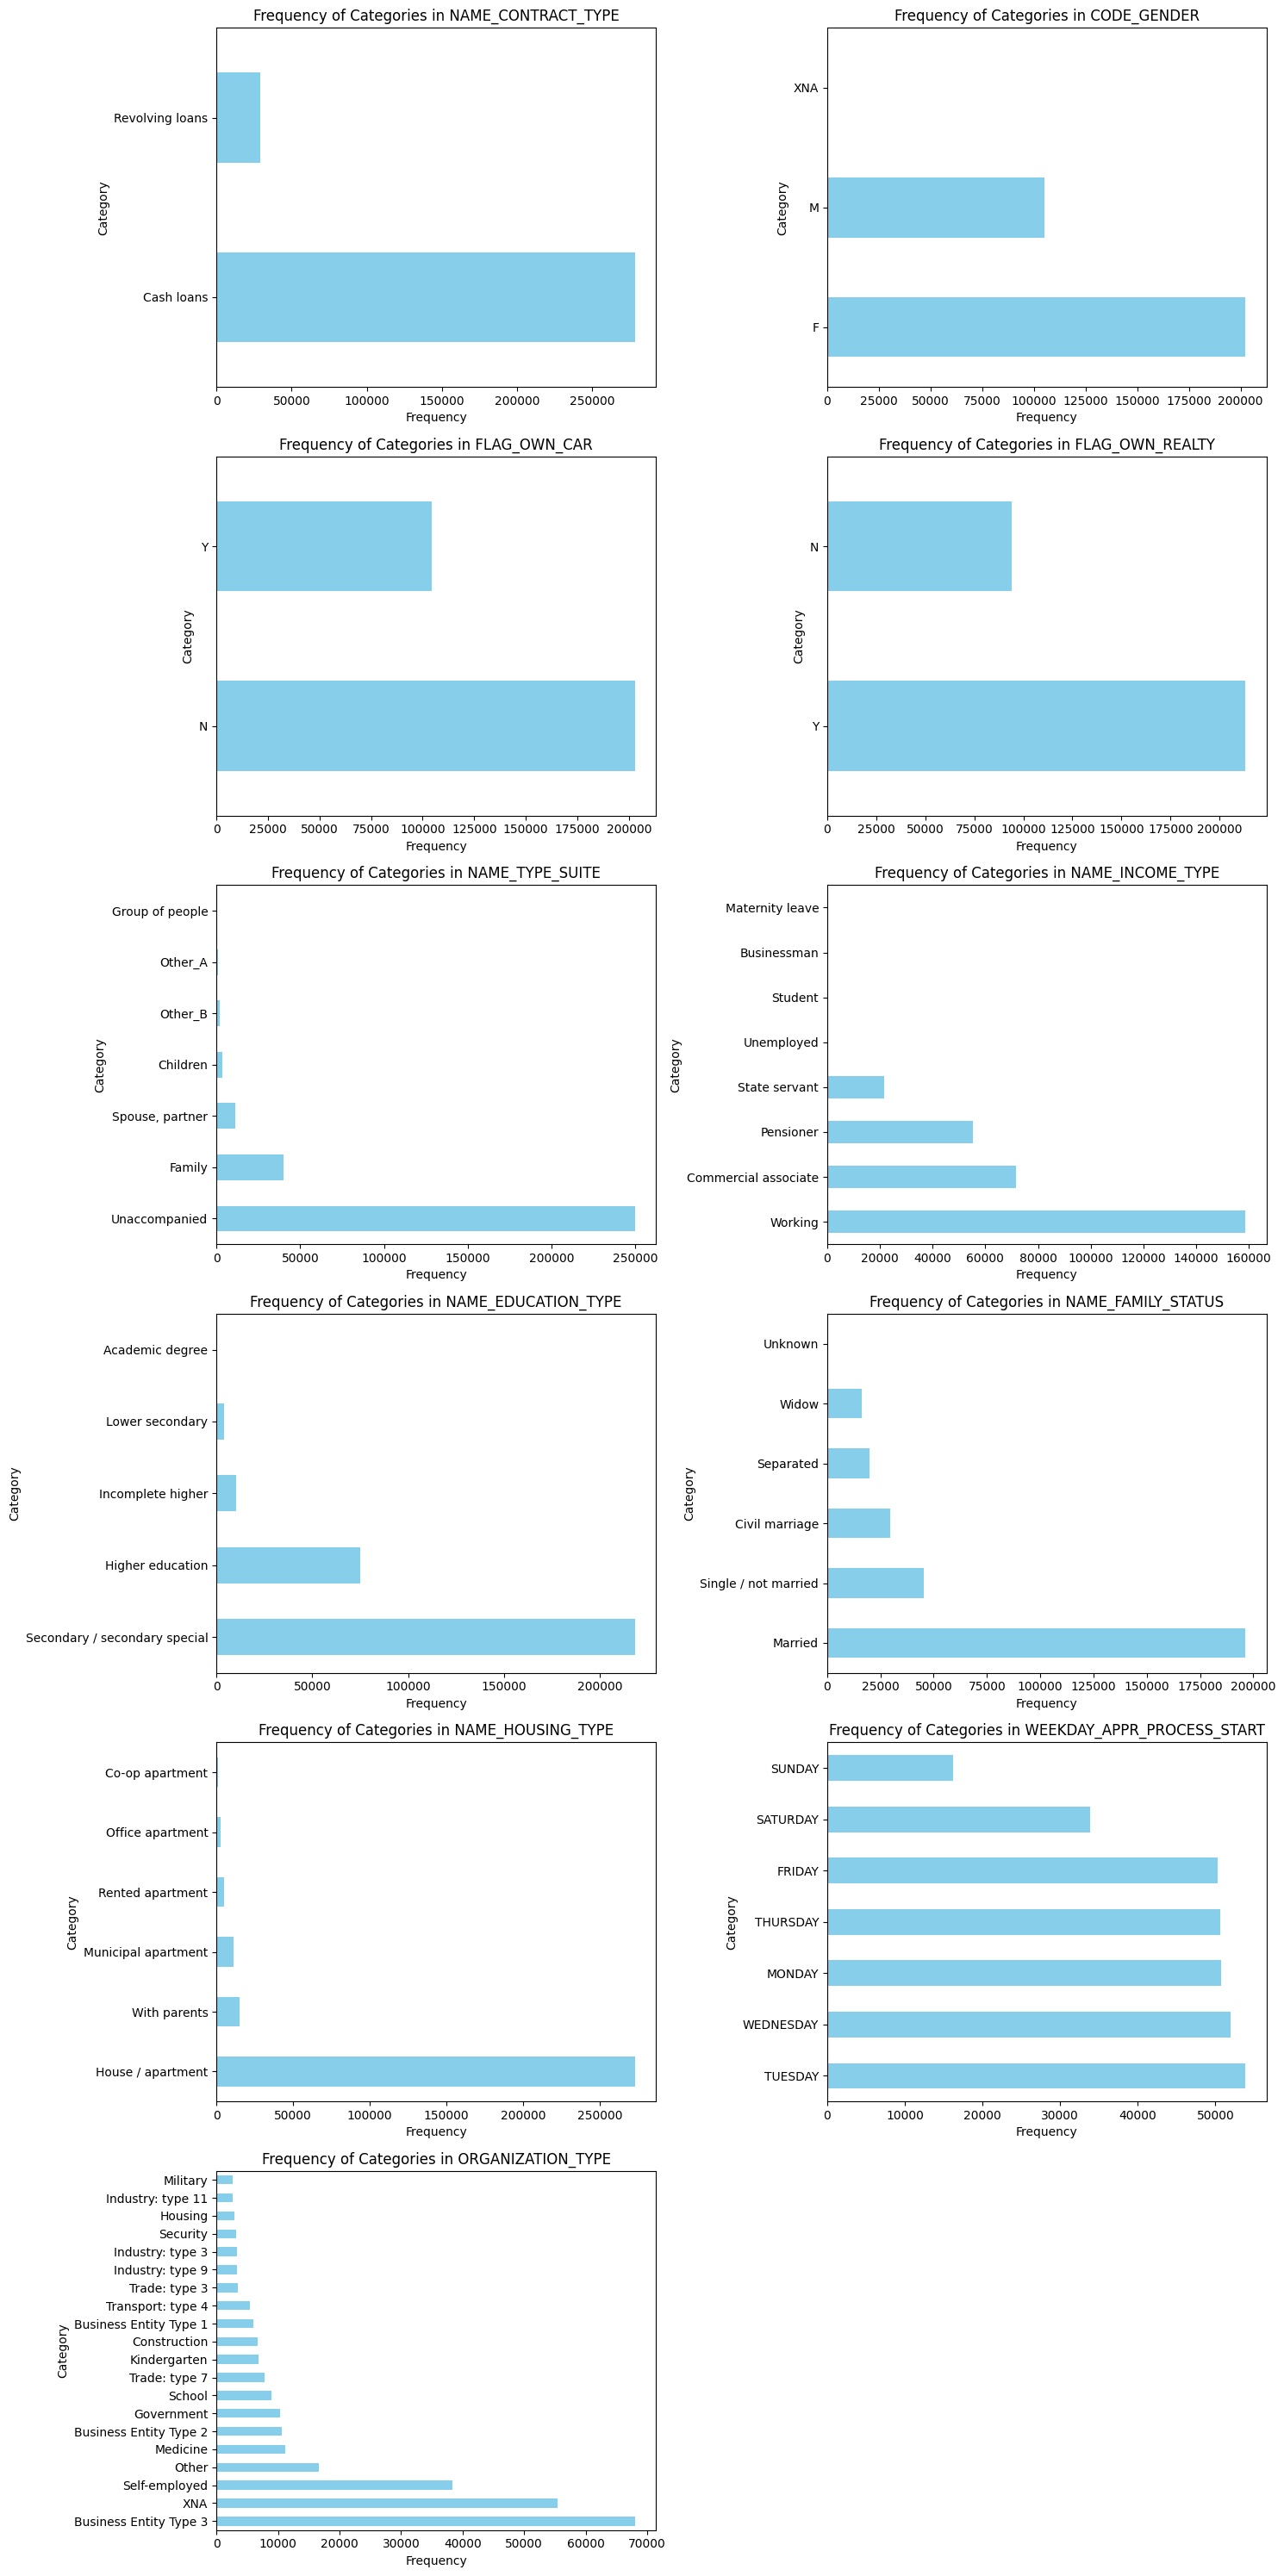

In [235]:
num_cols = 2  # Number of columns in the grid
num_rows = (len(categorical_features) + num_cols - 1) // num_cols  # Calculate number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))  # Adjust figsize accordingly
axes = axes.ravel()  # Flatten the axes array for easy iteration

for idx, col in enumerate(categorical_features):
    data[col].value_counts().head(20).plot(kind='barh', ax=axes[idx], color='skyblue')
    axes[idx].set_title(f'Frequency of Categories in {col}')
    axes[idx].set_xlabel('Frequency')
    axes[idx].set_ylabel('Category')

# If the number of categorical features is not a multiple of num_cols, hide the remaining axes
for ax in axes[len(categorical_features):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

In [236]:
le = LabelEncoder()
for col in categorical_features:
	data[col] = le.fit_transform(data[col])

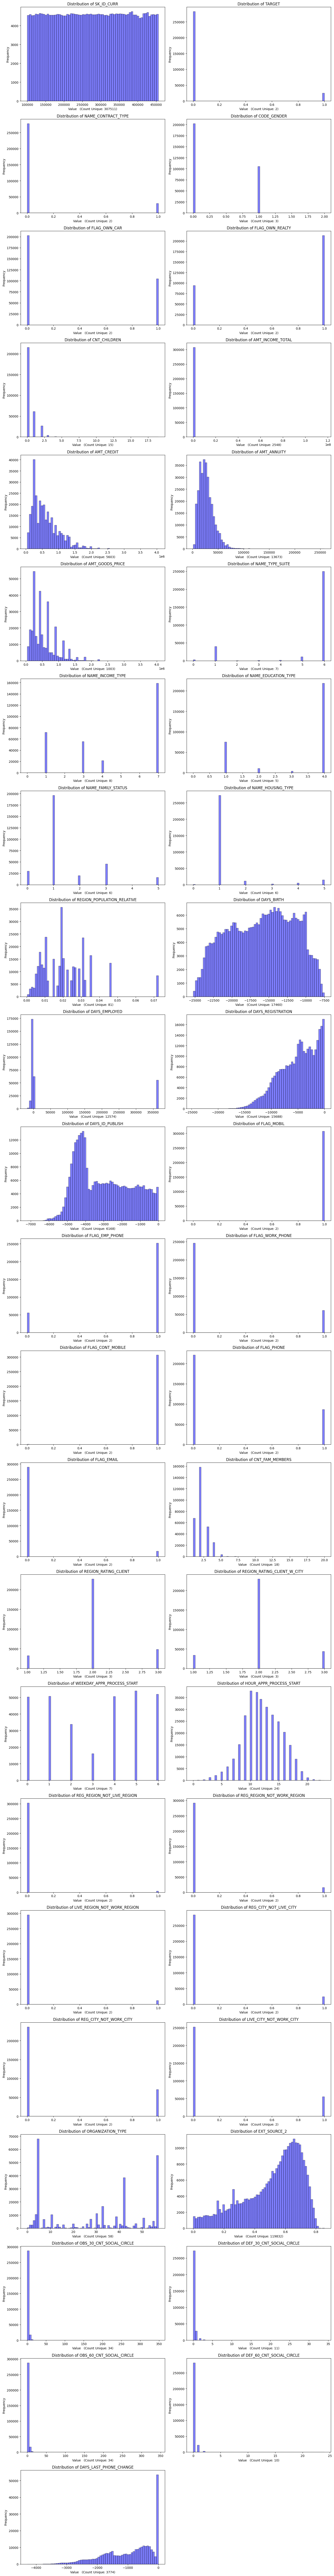

In [237]:
num_cols = 2
num_features = data.shape[1]
num_rows = (num_features + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axes = axes.ravel()

for idx, col in enumerate(data.columns):
    min_val = data[col].min()
    max_val = data[col].max()
    range_val = max_val - min_val
    bin_width = range_val / (len(data[col]) ** (1/3))
    bins = int(range_val / bin_width)
    axes[idx].hist(data[col], bins=bins, alpha=0.5, color='b', edgecolor='black')
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_ylabel('Frequency')
    unique_count = data[col].nunique()
    axes[idx].set_xlabel('Value' + f'   (Count Unique: {unique_count})')

for ax in axes[idx+1:]:
    ax.axis('off')

plt.tight_layout()
plt.show()


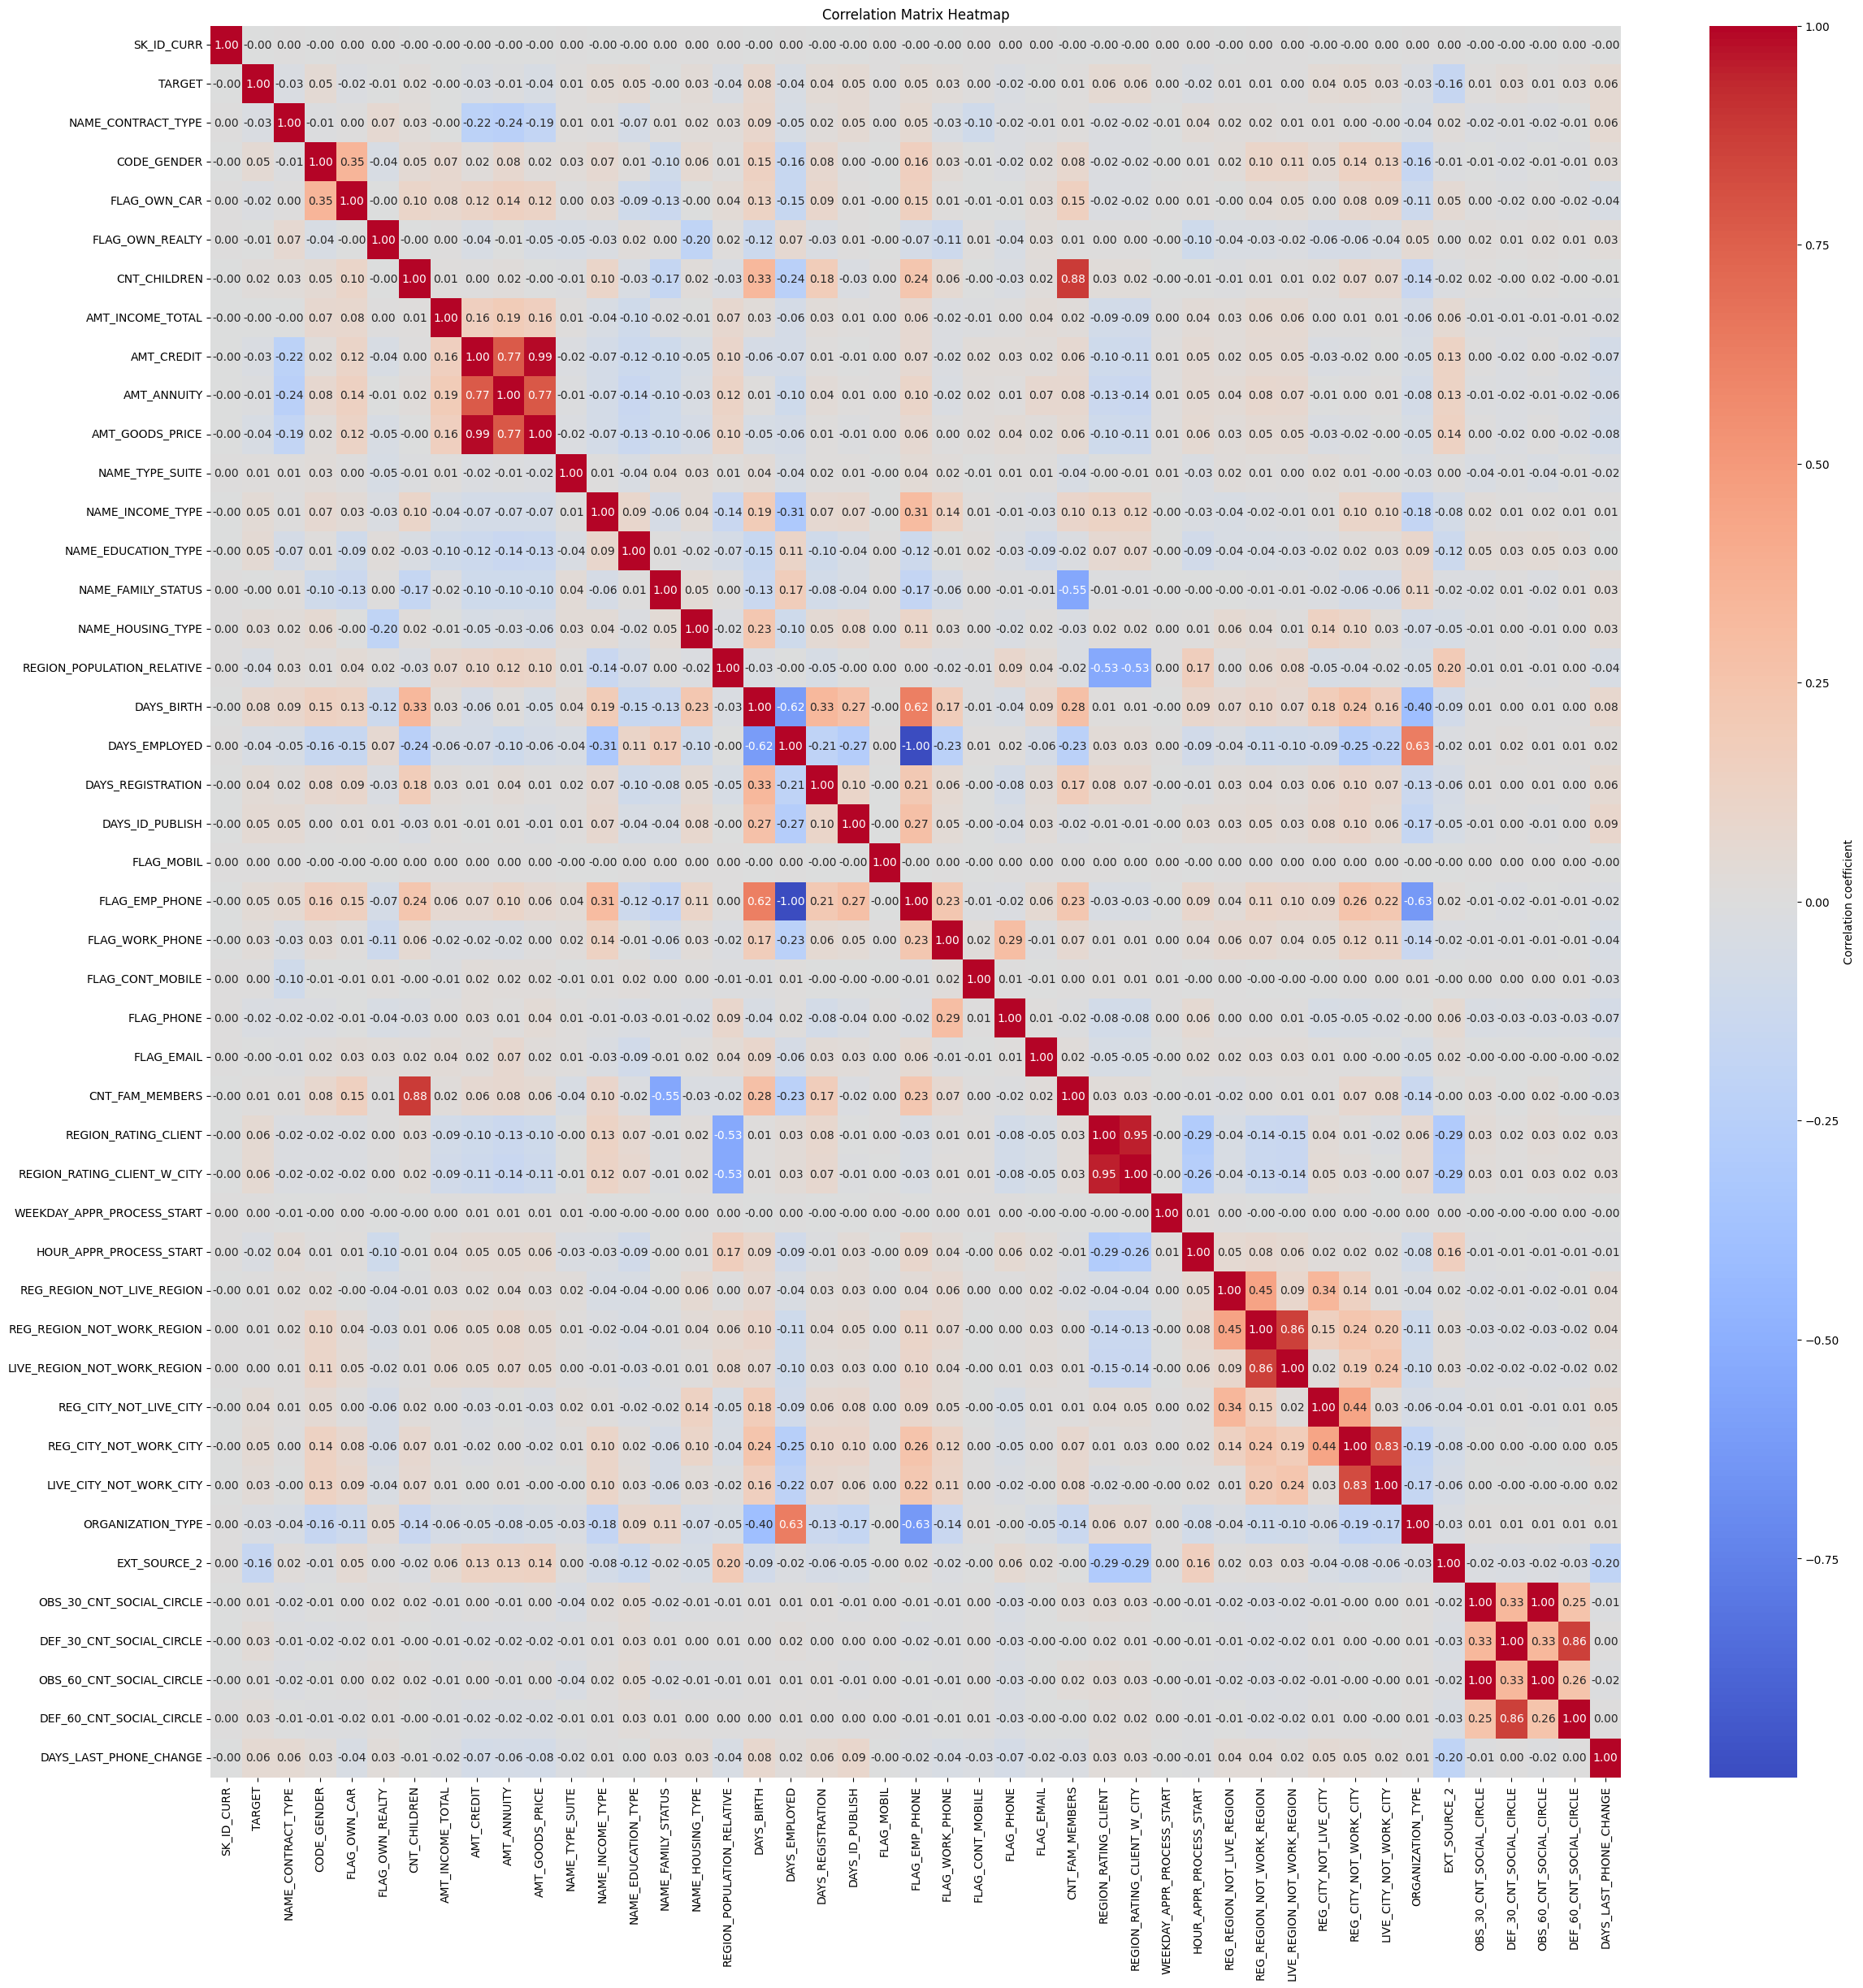

In [238]:
correlation_matrix = data.corr()


plt.figure(figsize=(28, 28)) 
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation coefficient'})
plt.title('Correlation Matrix Heatmap')
plt.show()



In [239]:
threshold = 0.8  # Change this threshold based on your analysis
highly_correlated = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):  # i + 1 to avoid self-correlation
        if abs(correlation_matrix.iloc[i, j]) >= threshold:
            col_name1 = correlation_matrix.columns[i]
            col_name2 = correlation_matrix.columns[j]
            coefficient = correlation_matrix.iloc[i, j]
            highly_correlated.append((col_name1, col_name2, coefficient))

# Show them in a DataFrame
highly_correlated_df = pd.DataFrame(highly_correlated, columns=['Feature 1', 'Feature 2', 'Correlation Coefficient'])

highly_correlated_df

Feature 1                    Feature 2  \
0                CNT_CHILDREN              CNT_FAM_MEMBERS   
1                  AMT_CREDIT              AMT_GOODS_PRICE   
2               DAYS_EMPLOYED               FLAG_EMP_PHONE   
3        REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY   
4  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION   
5      REG_CITY_NOT_WORK_CITY      LIVE_CITY_NOT_WORK_CITY   
6    OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE   
7    DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE   

   Correlation Coefficient  
0                 0.879160  
1                 0.986588  
2                -0.999755  
3                 0.950842  
4                 0.860627  
5                 0.825575  
6                 0.998490  
7                 0.860517

In [241]:
print("shape before dropping highly correlated features drop: ", data.shape)
highly_correlated_features = [
			'FLAG_EMP_PHONE',
			'AMT_GOODS_PRICE', 
			'CNT_CHILDREN',
            'REGION_RATING_CLIENT', 
			'REG_REGION_NOT_WORK_REGION',
			'REG_CITY_NOT_WORK_CITY',
			'OBS_30_CNT_SOCIAL_CIRCLE', 
			'DEF_30_CNT_SOCIAL_CIRCLE',
            ]

data = data.drop(highly_correlated_features, axis=1)


shape before dropping highly correlated features drop:  (307511, 45)


In [242]:
# Drop SK_ID_CURR
data = data.drop('SK_ID_CURR', axis=1)

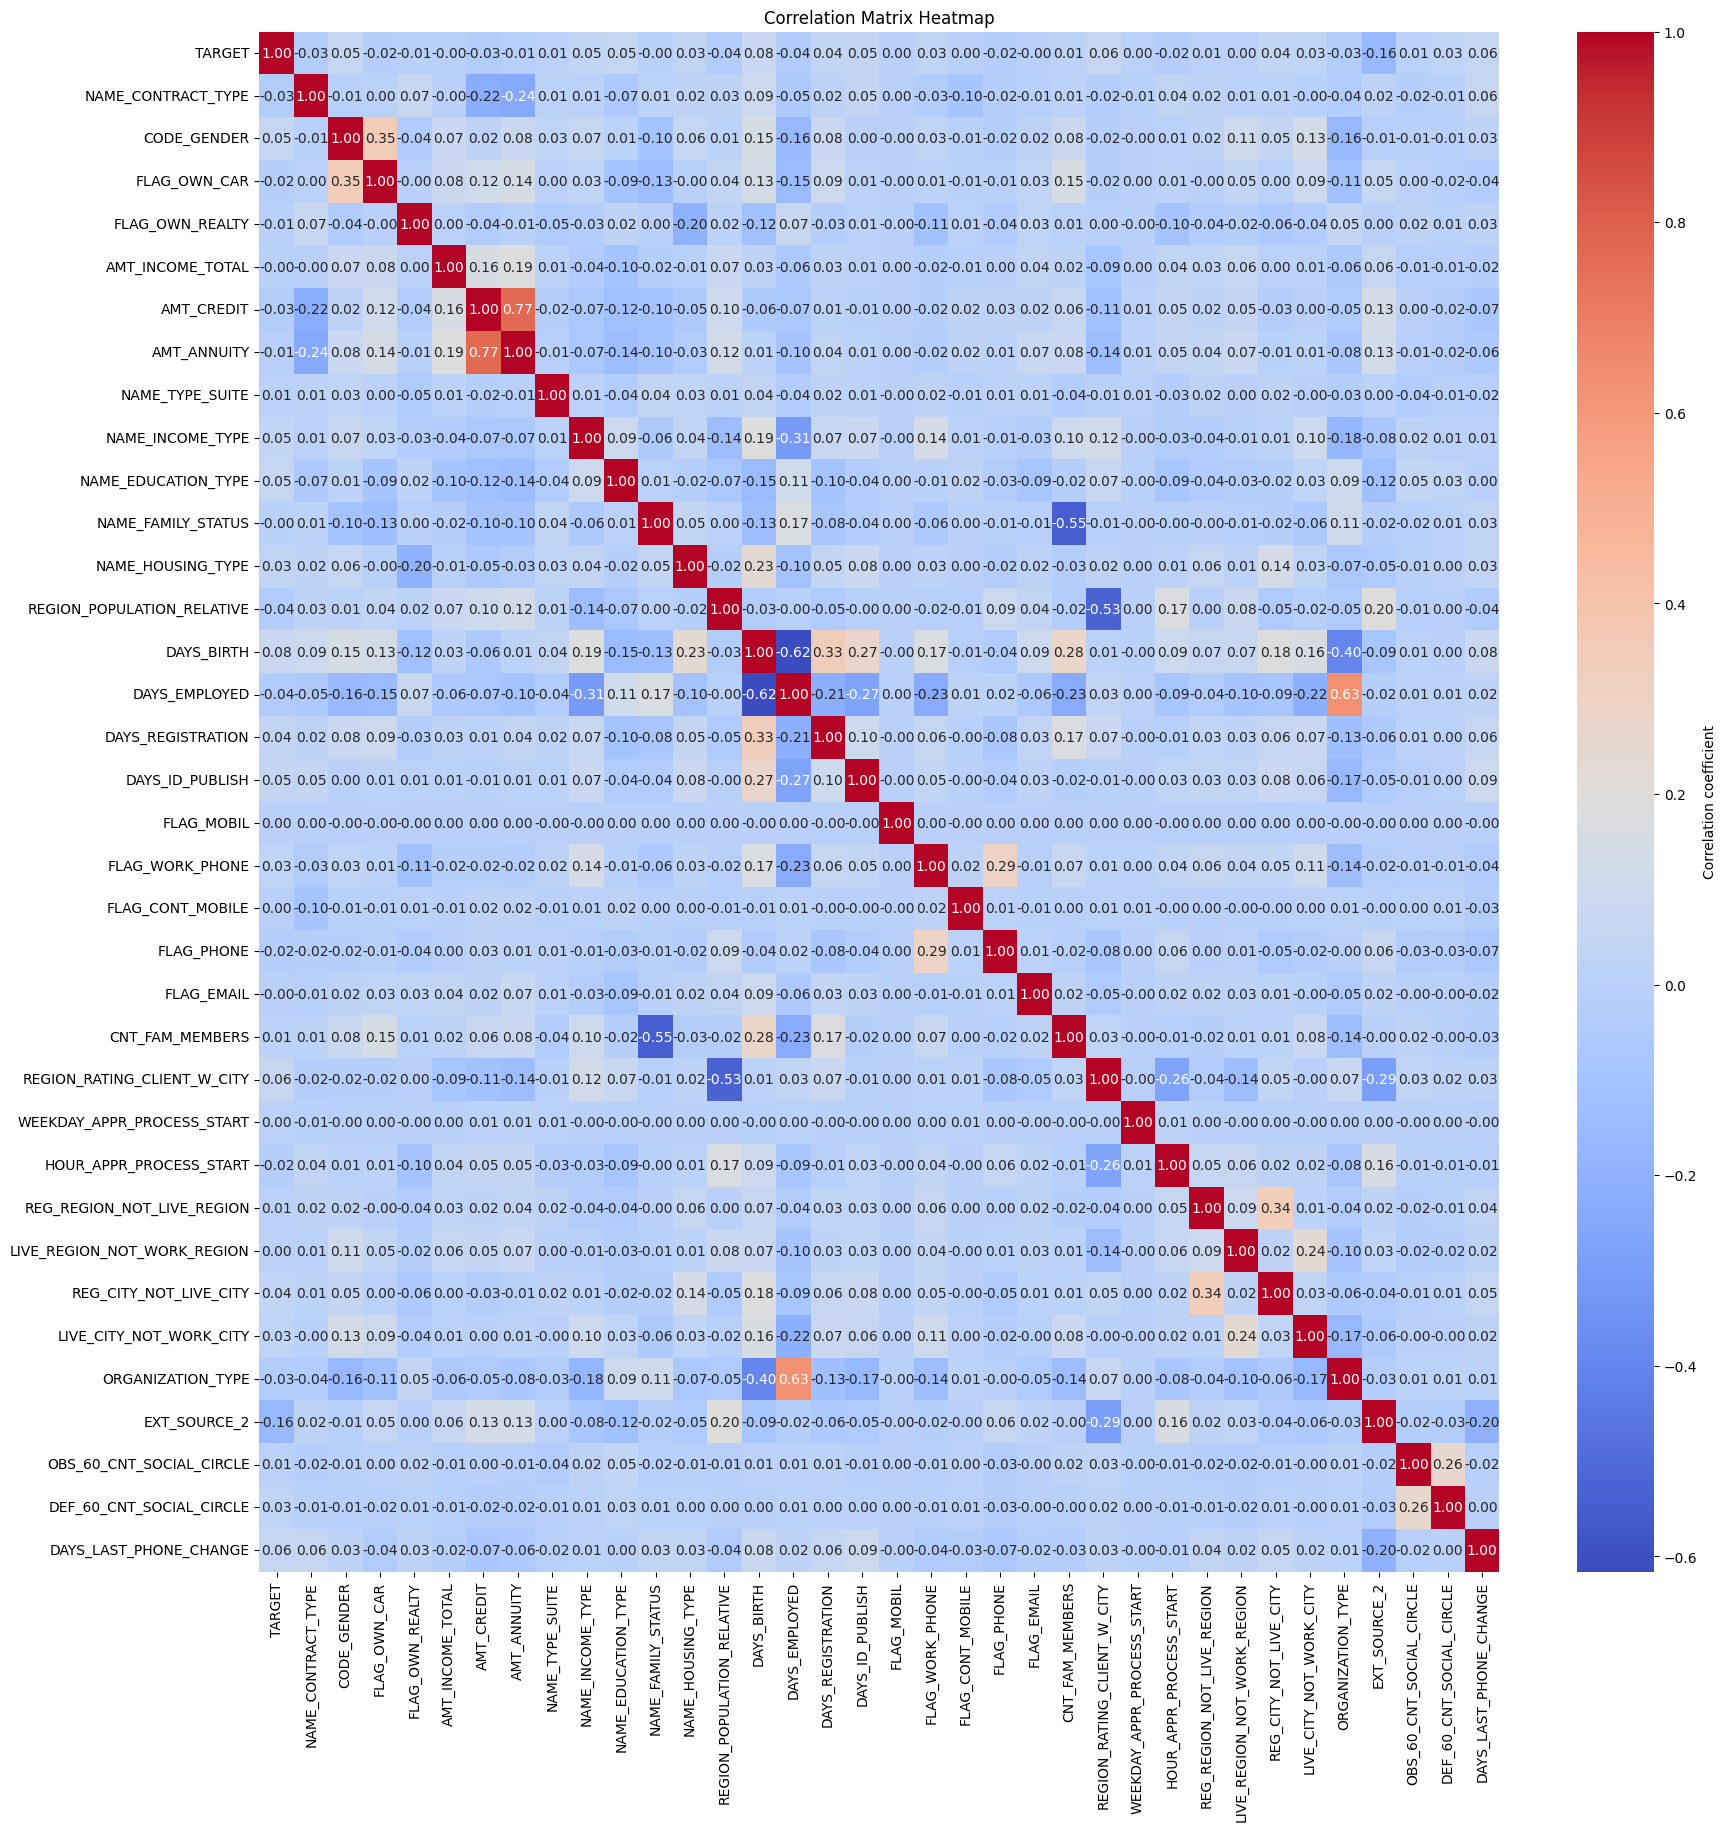

In [243]:
# Print new correlation matrix
correlation_matrix = data.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation coefficient'})
plt.title('Correlation Matrix Heatmap')
plt.show()

In [244]:
import numpy as np

def find_columns_with_outliers(df):
    outlier_columns = []
    for column in df.select_dtypes(include=[np.number]).columns:  # Only numerical columns
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        upper_bound = Q3 + 3 * IQR

        # Check if any value in the column is greater than the upper bound
        if any(df[column] > upper_bound):
            outlier_columns.append(column)

    return outlier_columns

# Get columns with high outliers
# Without target

columns_with_uniques_greater_than_5 = []
for column in data.columns:
    if data[column].nunique() > 3:
        columns_with_uniques_greater_than_5.append(column)

print("Columns with uniques greater than 5: ", columns_with_uniques_greater_than_5)
columns_with_high_outliers = find_columns_with_outliers(data[columns_with_uniques_greater_than_5])
print("Columns with high outliers:", columns_with_high_outliers)


Columns with uniques greater than 5:  ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE']
Columns with high outliers: ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'NAME_HOUSING_TYPE', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']


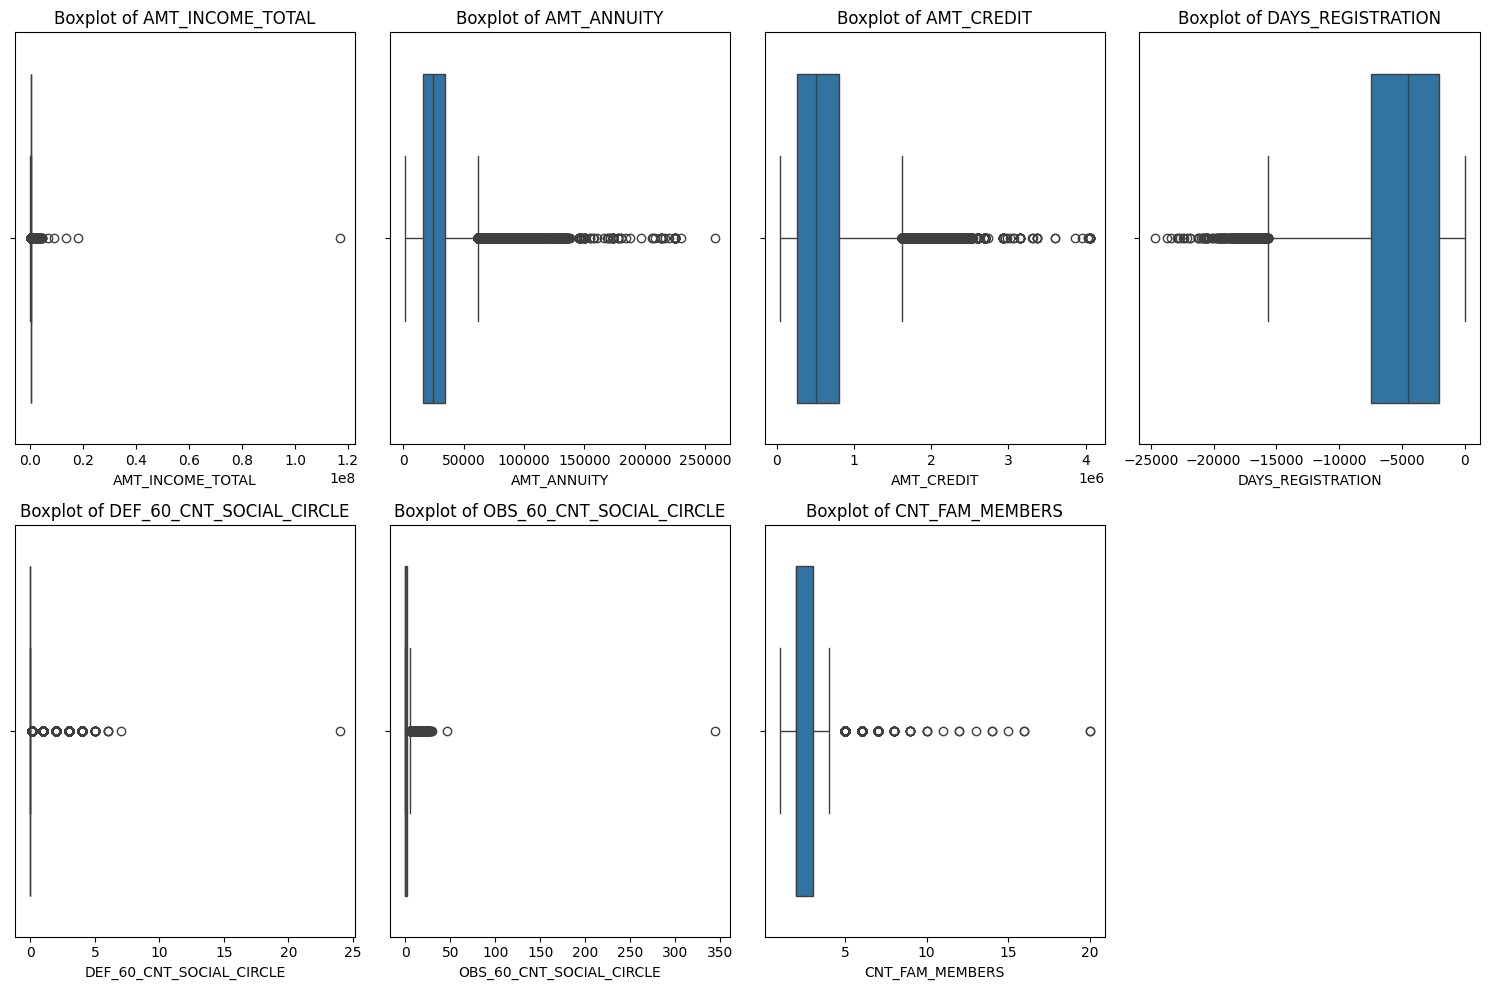

In [245]:
outliers_to_check = ['AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'AMT_CREDIT', 'DAYS_REGISTRATION', 'DEF_60_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'CNT_FAM_MEMBERS']

def plot_boxplots_in_grid(df, columns, num_cols=2):
    num_rows = (len(columns) + num_cols - 1) // num_cols  # Calculate number of rows needed

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))  # Adjust figsize accordingly
    axes = axes.ravel()  # Flatten the axes array for easy iteration

    for idx, col in enumerate(columns):
        if idx < len(columns):
            sns.boxplot(x=df[col], ax=axes[idx])
            axes[idx].set_title(f'Boxplot of {col}')
        else:
            axes[idx].set_visible(False)  # Hide unused axes if the number of plots is less than the number of subplots

    # Hide any leftover axes if the number of columns is less than the grid size
    for ax in axes[len(columns):]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

plot_boxplots_in_grid(data, outliers_to_check, num_cols=4)

In [246]:
data = data.drop(data[data['AMT_INCOME_TOTAL'] > 0.6e6].index)
data = data.drop(data[data['AMT_ANNUITY'] > 0.125e6].index)
data = data.drop(data[data['AMT_CREDIT'] > 2.0e6].index)
data = data.drop(data[data['DAYS_REGISTRATION'] < -15e3].index)
data = data.drop(data[data['DEF_60_CNT_SOCIAL_CIRCLE'] > 15].index)
data = data.drop(data[data['OBS_60_CNT_SOCIAL_CIRCLE'] > 100].index)
data = data.drop(data[data['CNT_FAM_MEMBERS'] > 10].index)

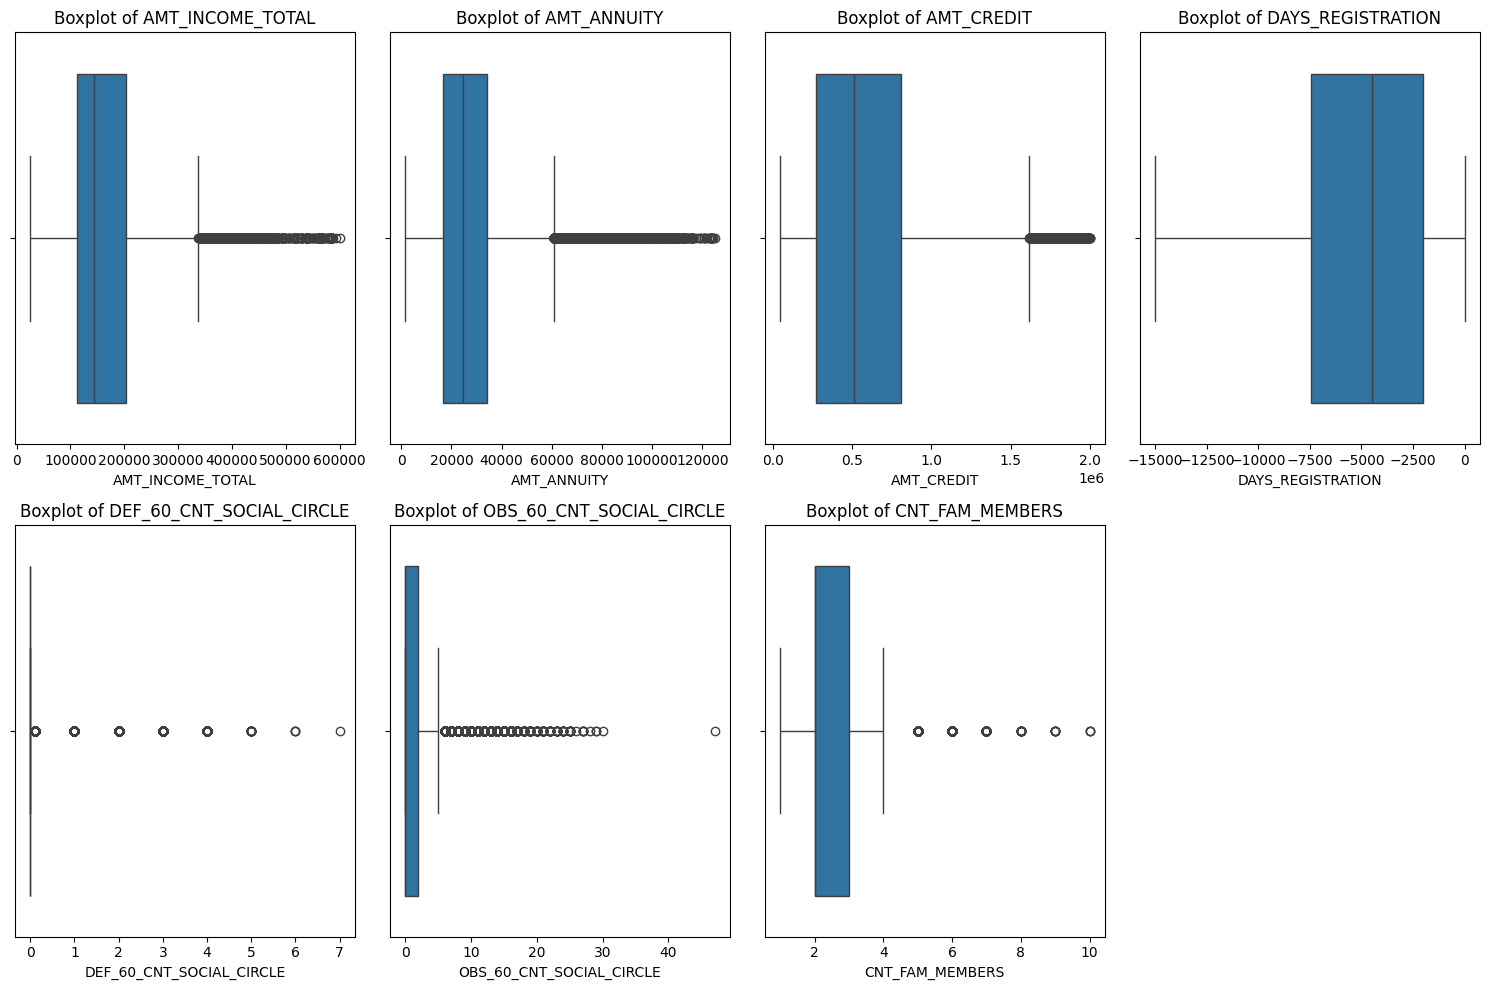

In [247]:
# Show the boxplots again to confirm that the outliers have been removed
plot_boxplots_in_grid(data, outliers_to_check, num_cols=4)


In [248]:
# Calculate new correlation matrix
correlation_matrix = data.corr()

In [ ]:
# Make this cell stop running
# import sysfadfsa

302751
TARGET


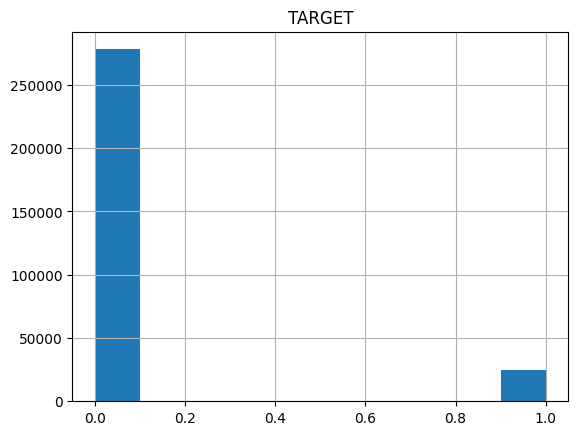

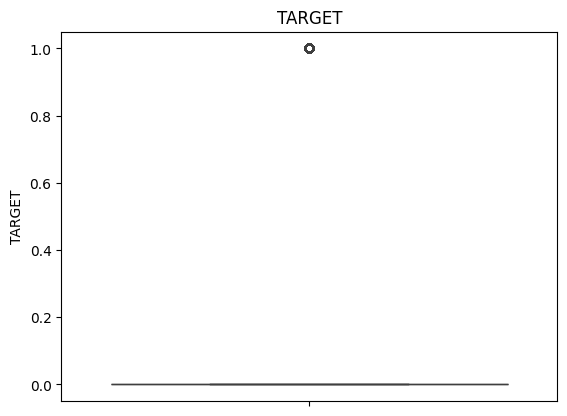

NAME_CONTRACT_TYPE


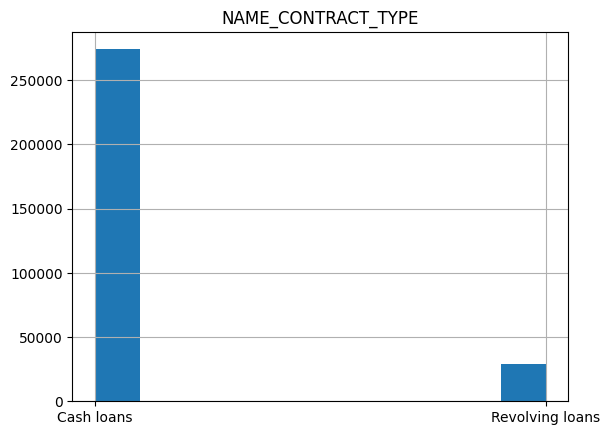

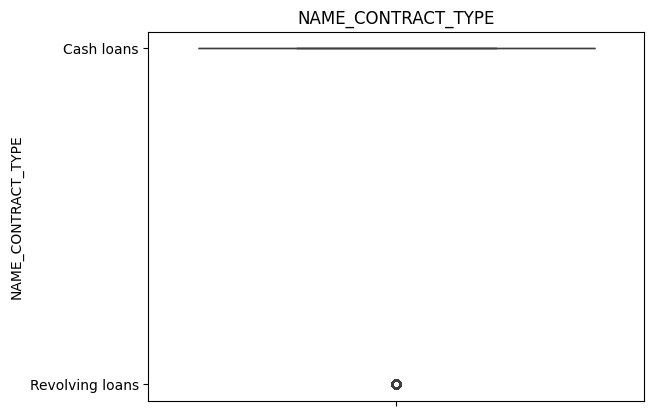

CODE_GENDER


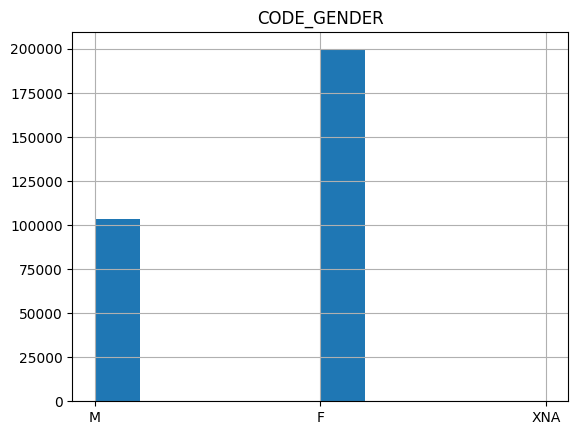

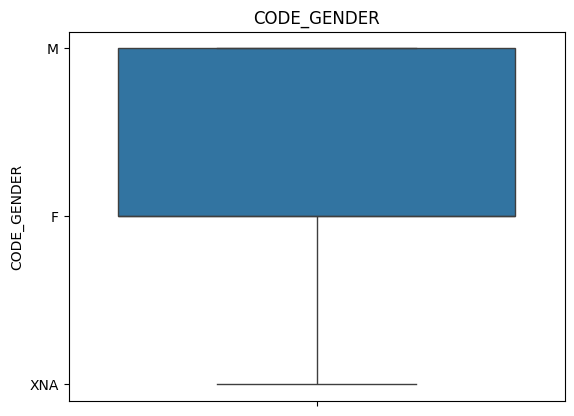

FLAG_OWN_CAR


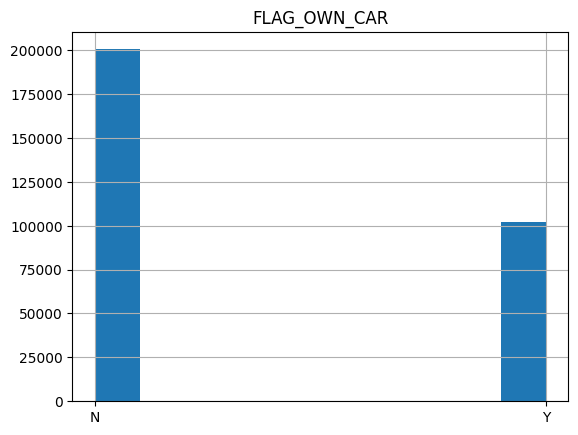

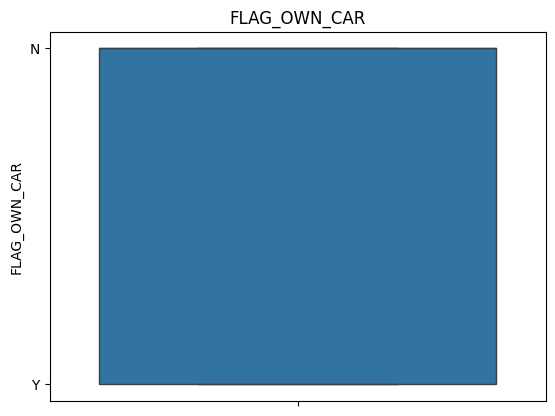

FLAG_OWN_REALTY


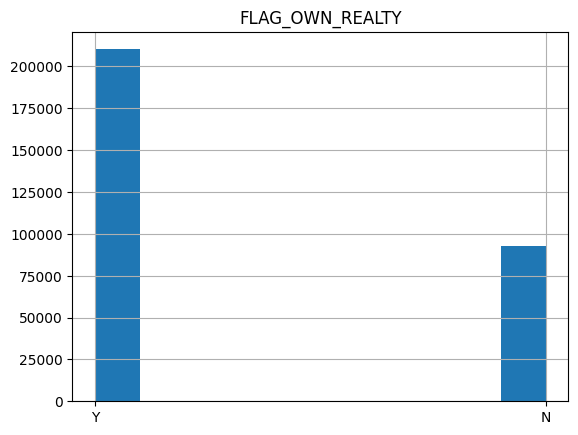

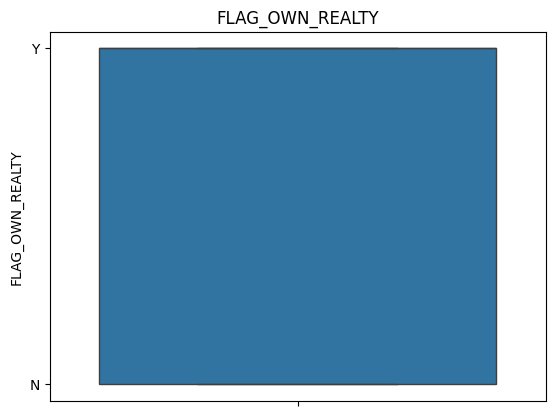

NAME_TYPE_SUITE


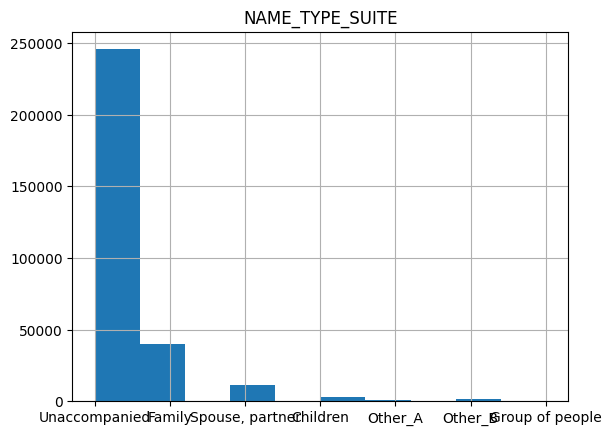

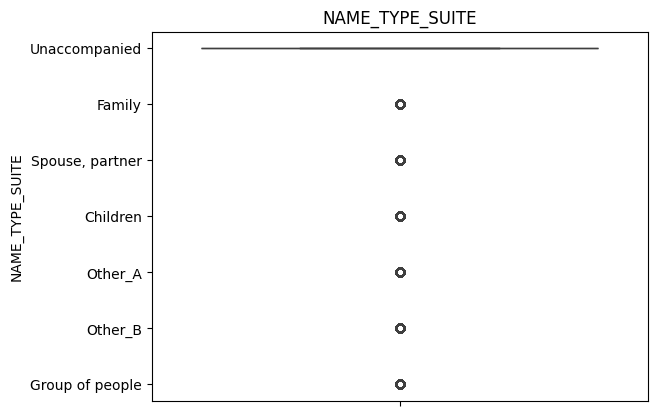

NAME_INCOME_TYPE


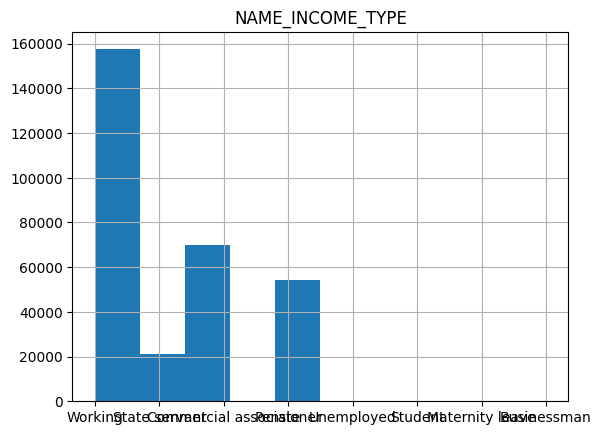

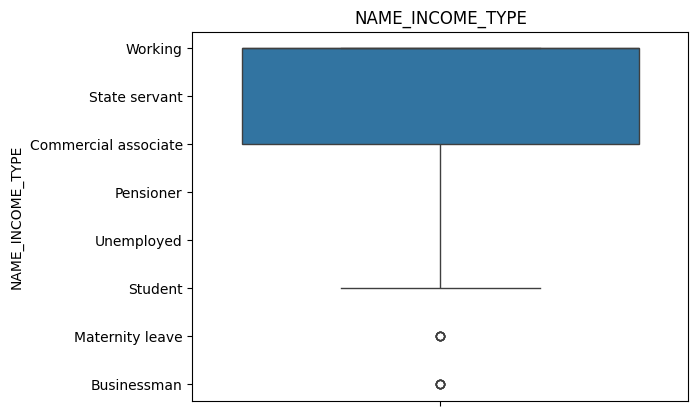

NAME_EDUCATION_TYPE


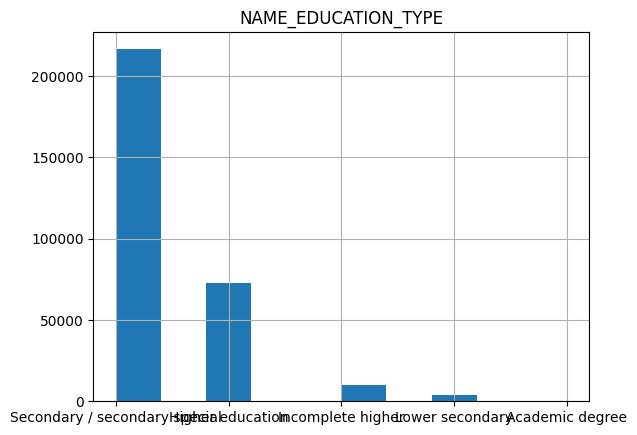

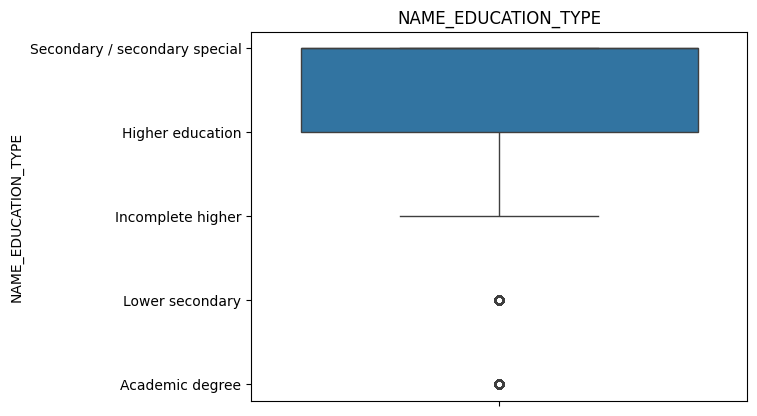

NAME_FAMILY_STATUS


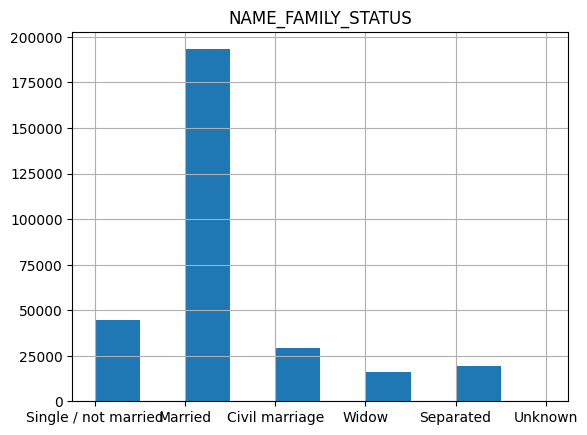

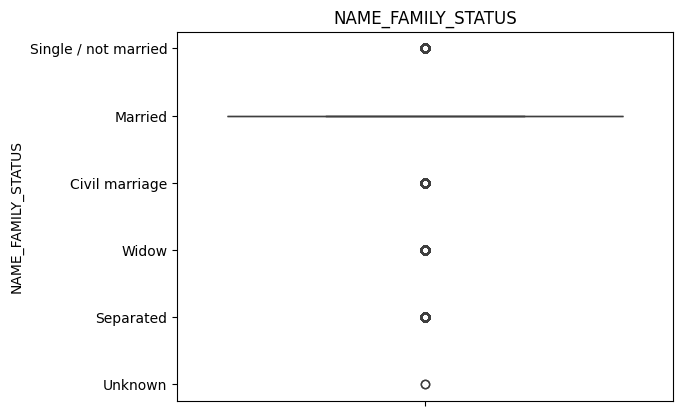

NAME_HOUSING_TYPE


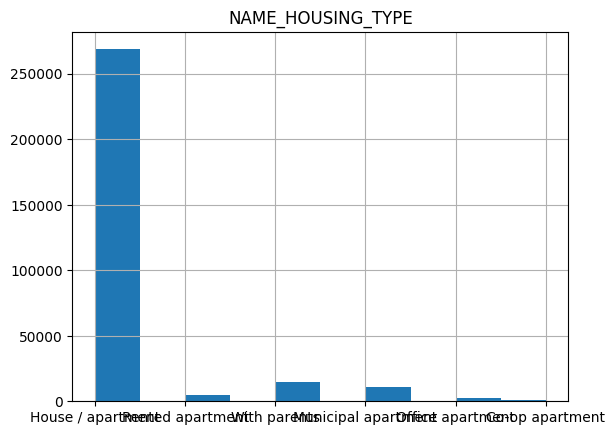

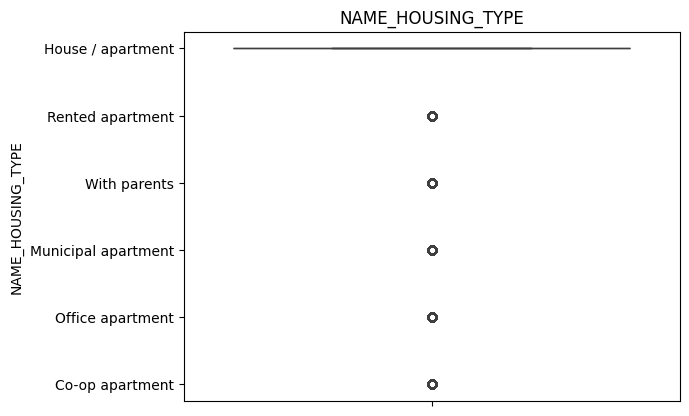

FLAG_EMP_PHONE


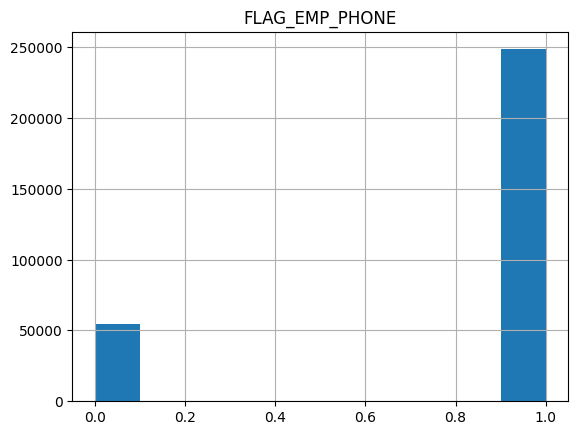

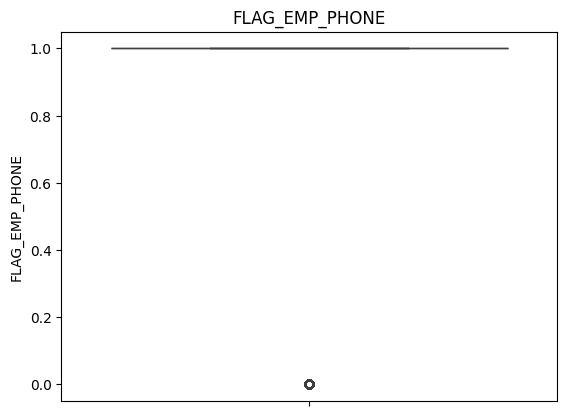

FLAG_WORK_PHONE


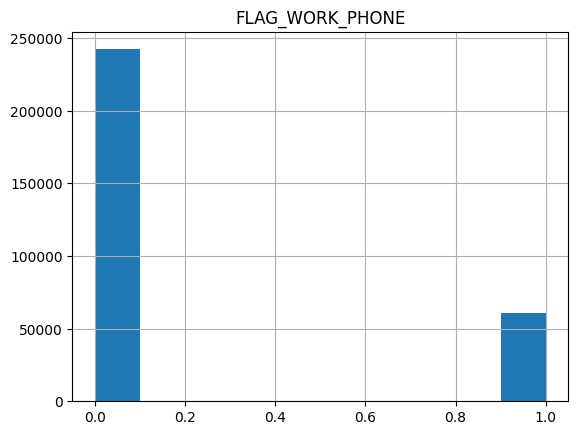

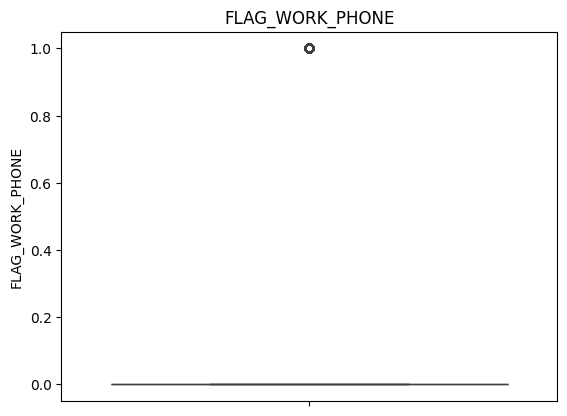

FLAG_CONT_MOBILE


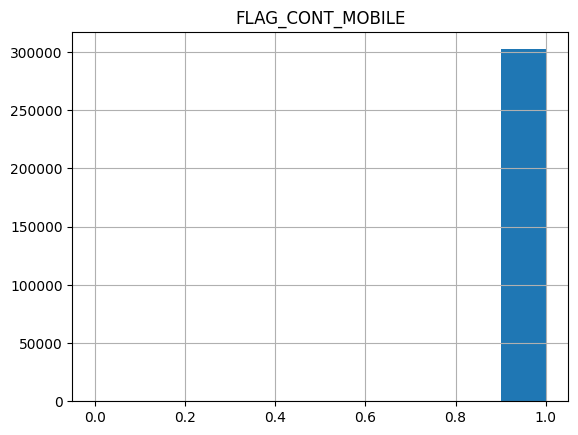

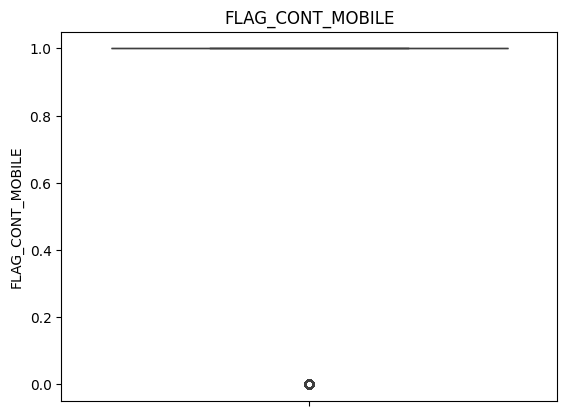

FLAG_PHONE


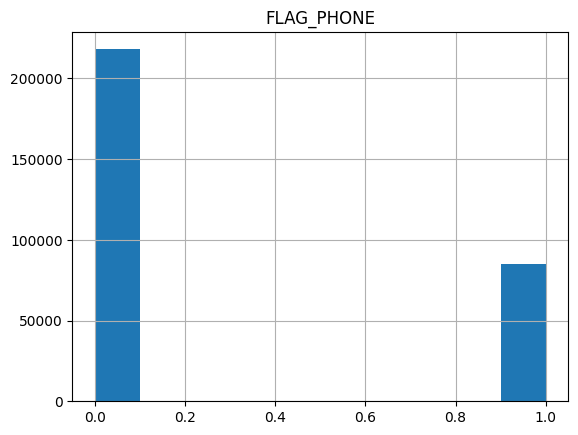

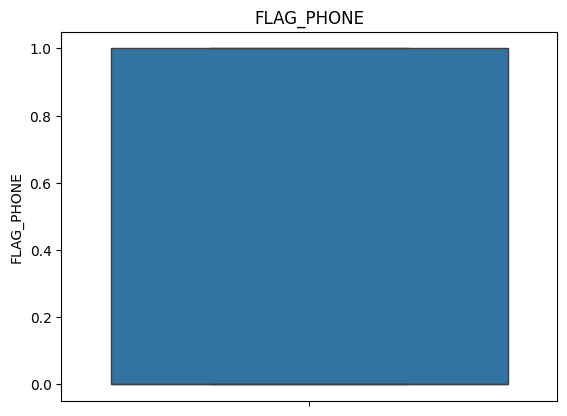

FLAG_EMAIL


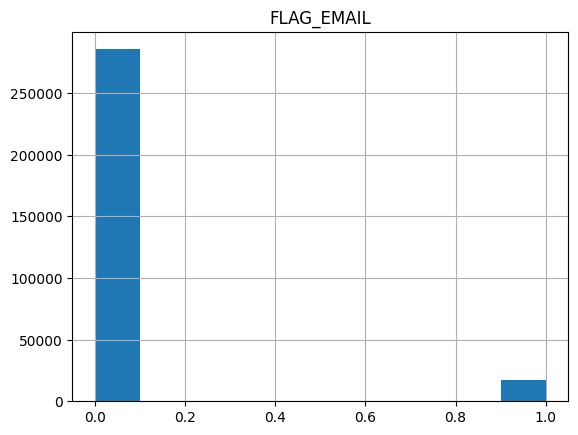

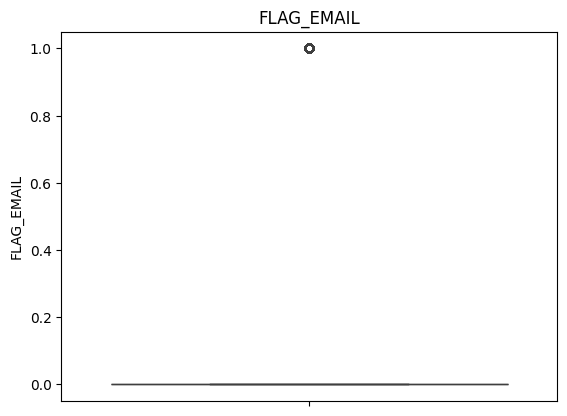

REGION_RATING_CLIENT_W_CITY


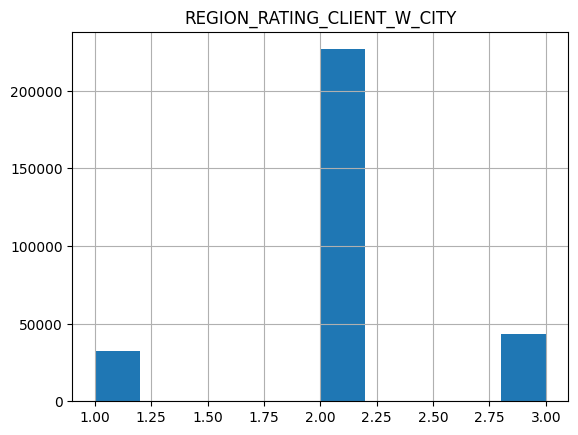

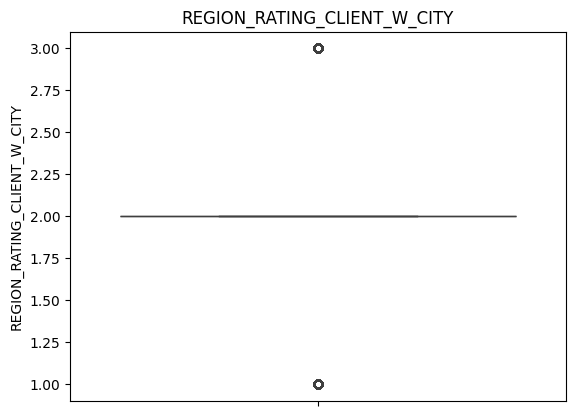

WEEKDAY_APPR_PROCESS_START


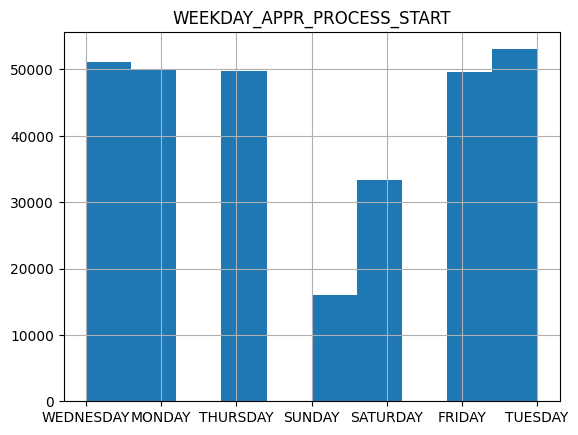

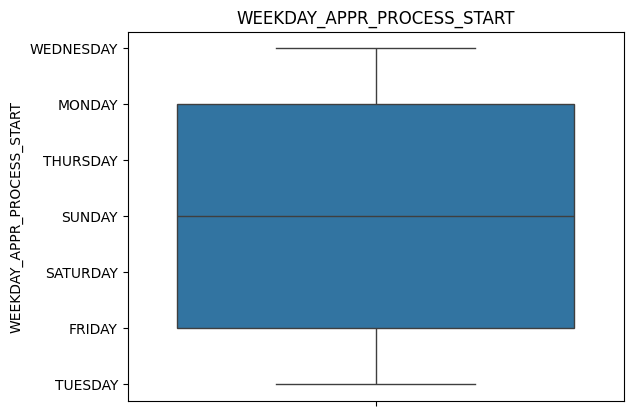

LIVE_REGION_NOT_WORK_REGION


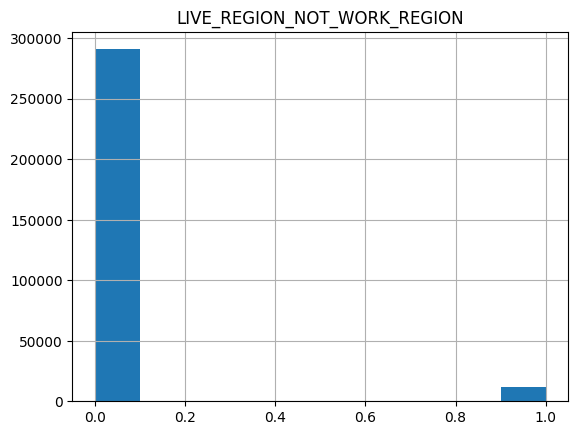

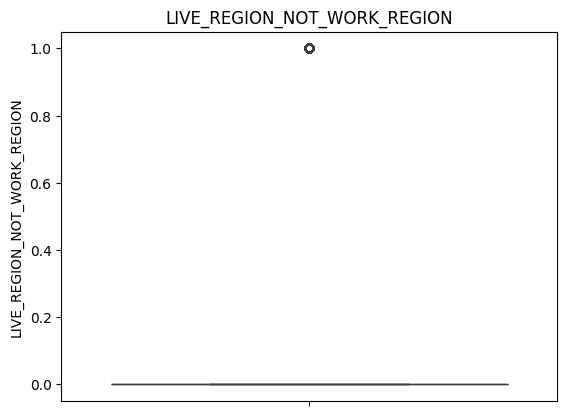

REG_CITY_NOT_LIVE_CITY


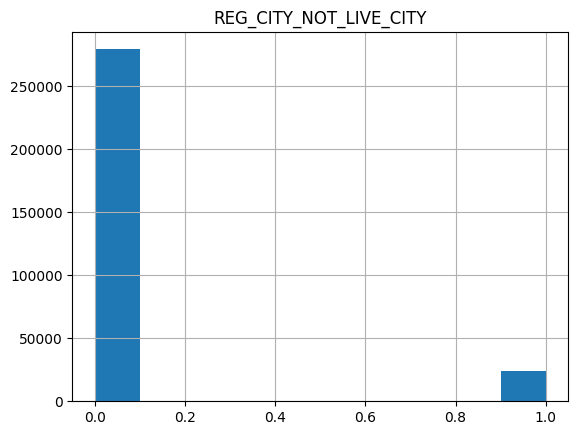

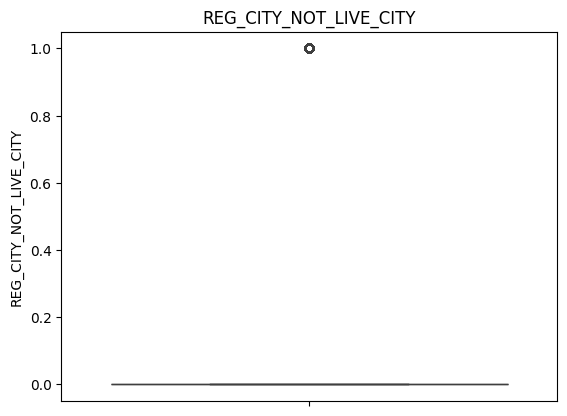

LIVE_CITY_NOT_WORK_CITY


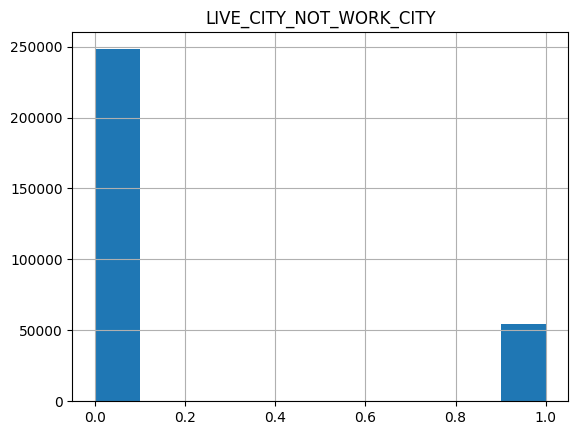

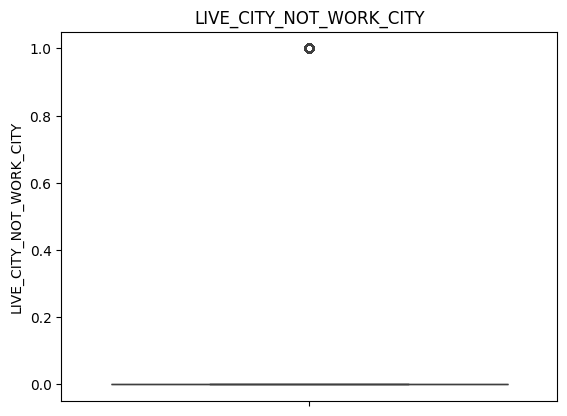

ORGANIZATION_TYPE


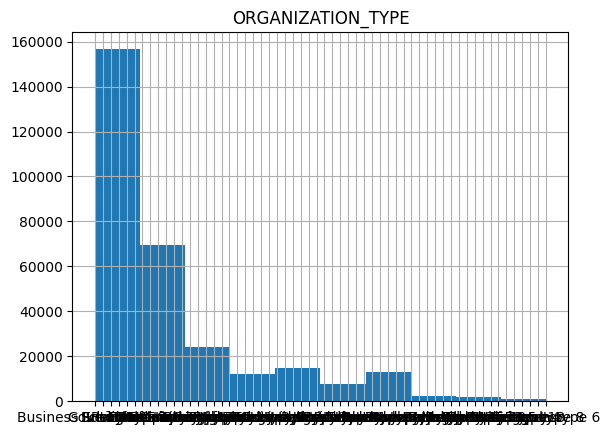

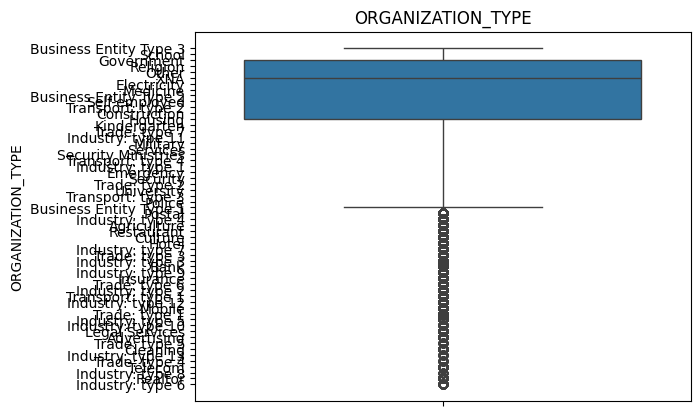

OBS_60_CNT_SOCIAL_CIRCLE


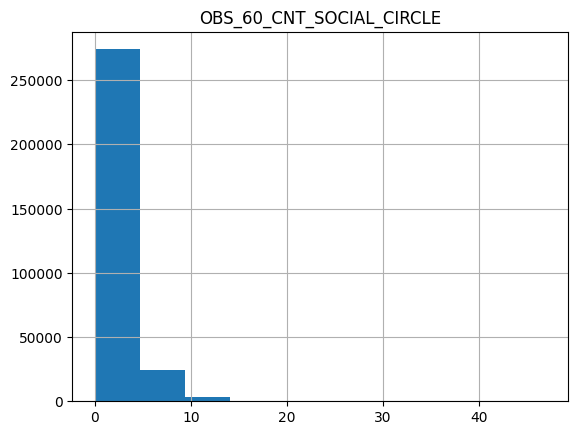

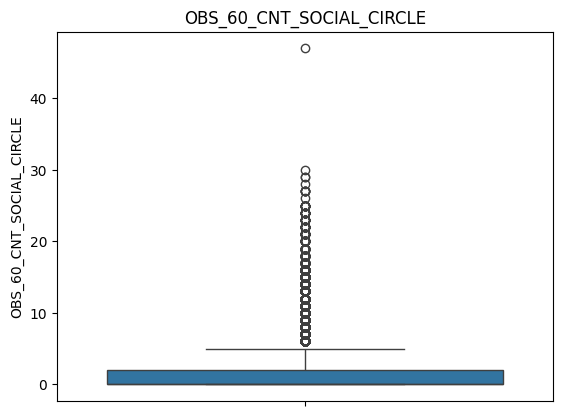

DEF_60_CNT_SOCIAL_CIRCLE


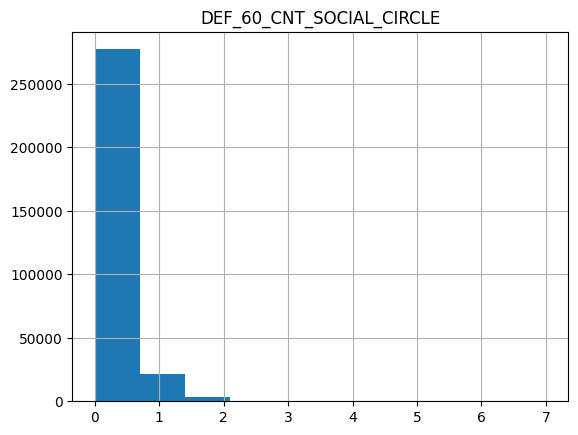

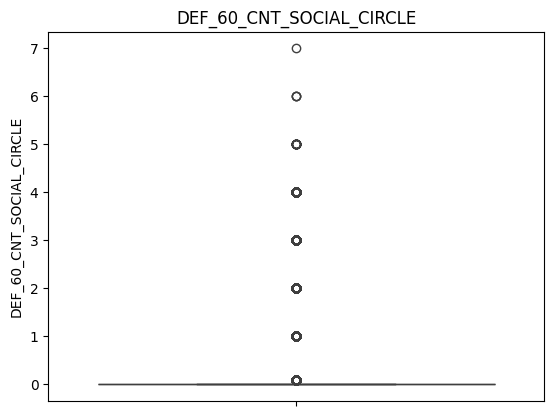

In [ ]:
data = get_cleaned_data_final(convert_categorical=False)

print(len(data))

cols = [
    'DAYS_LAST_PHONE_CHANGE',
    'HOUR_APPR_PROCESS_START',
    'EXT_SOURCE_1',
    'EXT_SOURCE_2',
    'EXT_SOURCE_3',
    'AMT_INCOME_TOTAL',
    'AMT_CREDIT',
    'AMT_ANNUITY',
    'CNT_FAM_MEMBERS',
    'REGION_POPULATION_RELATIVE',
    'DAYS_BIRTH',
    'DAYS_EMPLOYED',
    'DAYS_REGISTRATION',
    'DAYS_ID_PUBLISH'
]
# show histogram of each column
for col in data.columns:
    if col in cols:
        continue
    print(col)
    # histogram
    plt.figure()
    data[col].hist()
    plt.title(col)
    plt.show()
    # boxplot
    plt.figure()
    sns.boxplot(data[col])
    plt.title(col)
    plt.show()

In [ ]:
data = convert_numberical_to_categorical(data, True)

DAYS_LAST_PHONE_CHANGE
DAYS_LAST_PHONE_CHANGE
DAYS_LAST_PHONE_CHANGE_-1500_0        60.015326
DAYS_LAST_PHONE_CHANGE_-4000_-1500    27.687109
Name: count, dtype: float64
HOUR_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
HOUR_APPR_PROCESS_START_6_18     92.868066
HOUR_APPR_PROCESS_START_18_24     4.726657
HOUR_APPR_PROCESS_START_0_6       2.405277
Name: count, dtype: float64
EXT_SOURCE_2
EXT_SOURCE_2
EXT_SOURCE_2_0.4_1    74.131877
EXT_SOURCE_2_0_0.     25.868123
Name: count, dtype: float64
AMT_INCOME_TOTAL
AMT_INCOME_TOTAL
AMT_INCOME_TOTAL_0_200000          72.117020
AMT_INCOME_TOTAL_200000_400000     25.895868
AMT_INCOME_TOTAL_400000_1000000     1.987112
Name: count, dtype: float64
AMT_CREDIT
AMT_CREDIT
AMT_CREDIT_0_600000           60.262394
AMT_CREDIT_600000_1000000     24.202067
AMT_CREDIT_1000000_2000000    15.535539
Name: count, dtype: float64
AMT_ANNUITY
AMT_ANNUITY
AMT_ANNUITY_0_30000         65.334879
AMT_ANNUITY_30000_50000     28.535661
AMT_ANNUITY_50000_200000     6.129460
Na

In [ ]:
data = get_cleaned_data(convert_categorical=True)

corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

NameError: name 'get_cleaned_data' is not defined

In [ ]:
# print columns with high correlation
cols_description = pd.read_csv('../data/columns_description.csv')
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > 0.7:
            colname = corr.columns[i] + ' and ' + corr.columns[j] + " : " +str(corr.iloc[i, j])
            print(colname)
            print(corr.columns[i] + " : " + cols_description[cols_description['Row'] == corr.columns[i]]['Description'].values[0])
            print(corr.columns[j] + " : " + cols_description[cols_description['Row'] == corr.columns[j]]['Description'].values[0])

AMT_ANNUITY and AMT_CREDIT : 0.7647988800999999
AMT_ANNUITY : Loan annuity
AMT_CREDIT : Credit amount of the loan
AMT_GOODS_PRICE and AMT_CREDIT : 0.9852250729618068
AMT_GOODS_PRICE : For consumer loans it is the price of the goods for which the loan is given
AMT_CREDIT : Credit amount of the loan
AMT_GOODS_PRICE and AMT_ANNUITY : 0.7681161032445476
AMT_GOODS_PRICE : For consumer loans it is the price of the goods for which the loan is given
AMT_ANNUITY : Loan annuity
FLAG_EMP_PHONE and DAYS_EMPLOYED : -0.9997638285127116
FLAG_EMP_PHONE : Did client provide work phone (1=YES, 0=NO)
DAYS_EMPLOYED : How many days before the application the person started current employment
CNT_FAM_MEMBERS and CNT_CHILDREN : 0.878382603779203
CNT_FAM_MEMBERS : How many family members does client have
CNT_CHILDREN : Number of children the client has
REGION_RATING_CLIENT_W_CITY and REGION_RATING_CLIENT : 0.9503833968040943
REGION_RATING_CLIENT_W_CITY : Our rating of the region where client lives with taking

In [ ]:
high_corr_cols = ['REGION_RATING_CLIENT', 
                  'AMT_GOODS_PRICE', 
                  'OBS_30_CNT_SOCIAL_CIRCLE', 
                  'DEF_30_CNT_SOCIAL_CIRCLE',
                  'REG_CITY_NOT_WORK_CITY',
                  'CNT_CHILDREN',
                  'REG_REGION_NOT_WORK_REGION']
